In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
path_base = Path('/home/yhuang2/PROJs/LS4GAN/toygan_outdir/toy-adc/vit/pretrain')
model_types = []
for model in sorted(path_base.glob('model*vitconvdeconv*8*')):
    model_type = model.stem.split('-')[-1]
    model_types.append(model_type)

# model_types.remove('16x16_instance')
print(model_types)

['8x8_None', '8x8_batch', '8x8_None_leakyrelu', '8x8_None_relu', '8x8_batch_leakyrelu', '8x8_batch_relu']


# Train loss history

In [12]:
histories = []
for model_type in model_types:
    model_folder = list(path_base.glob(f'*{model_type}'))[0]
    history_fname = model_folder/'history.csv'
    history = pd.read_csv(history_fname)
    histories.append(history)
    # print(history.head(5))

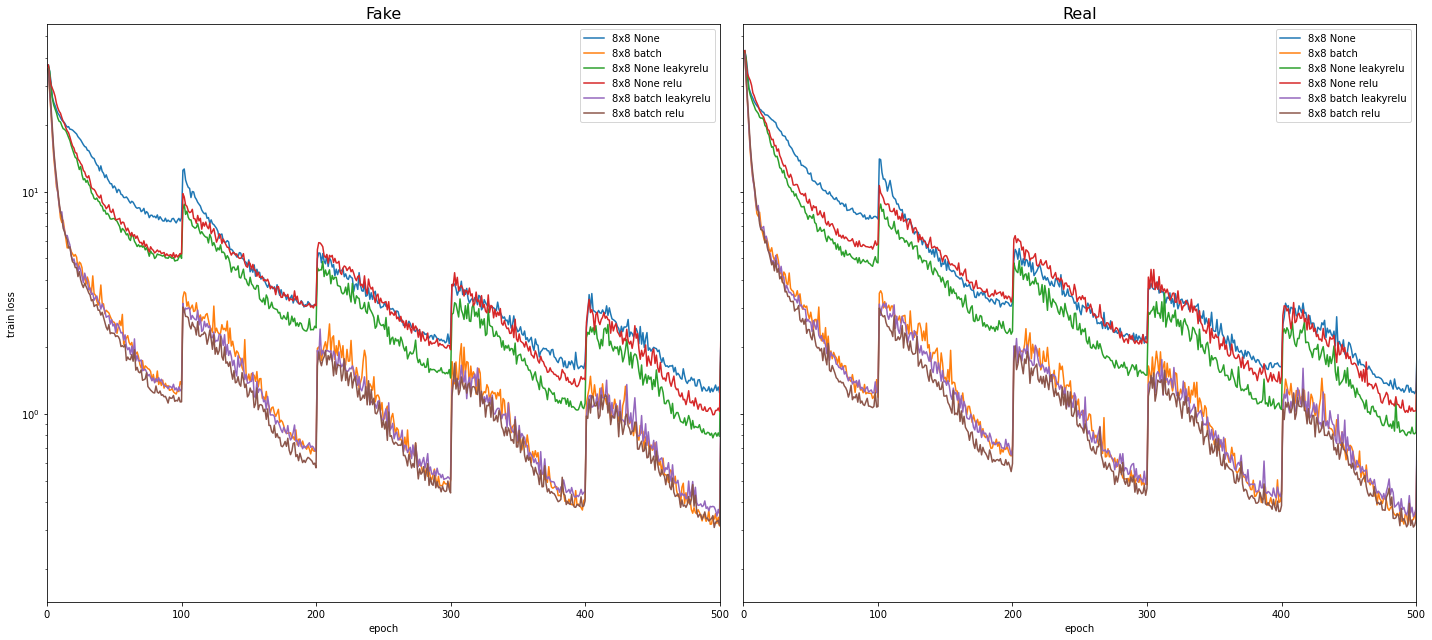

In [13]:
def plot_history(
    histories, 
    model_types, 
    figsize=(20, 9), 
    save_fname=None
):
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    for ax, y_col, title in zip(axes, ['loss_a', 'loss_b'], ['Fake', 'Real']):
        for history, model_type in zip(histories, model_types):
            history.plot(x='epoch', y=y_col, ax=ax, label=model_type.replace('_', ' '))
        ax.set_yscale('log')
        ax.legend()
        ax.set_xlim(0, 500)
        ax.set_title(title, fontsize=16)
        ax.set_ylabel('train loss')
    plt.subplots_adjust(wspace=0.1)
    plt.tight_layout()
    
    if save_fname:
        fig.savefig(save_fname, bbox_inches='tight', transparent=False, dpi=500)
plot_history(
    histories, 
    model_types,
    save_fname='results/training_loss_history.png'
)

# Evaluation

In [7]:
eval_metrics = []
epochs = ['final', 'final', 'epoch_0800', 'epoch_0800']
for model_type, epoch in zip(model_types, epochs):
    model_folder = list(path_base.glob(f'*{model_type}'))[0]
    eval_fname = list((model_folder/f'evals/{epoch}/').glob('average*csv'))[0]
    eval_metrics.append(pd.read_csv(eval_fname, header=None, index_col=0))

eval_metrics = pd.concat(eval_metrics, axis=1).T.drop(['prof_ks_fake', 'prof_ks_real'], axis=1)
eval_metrics.index = model_types
print(eval_metrics)
eval_metrics.to_csv('results/bert_vitconvdeconv_evals.csv', float_format='%.3f')
eval_metrics.to_excel('results/bert_vitconvdeconv_evals.xlsx', float_format='%.3f')

0             l1_fake   l2_fake  prof_l1_fake  prof_l2_fake   l1_real  \
16x16_None   0.107271  0.779769      4.555741    414.104961  0.137523   
16x16_batch  0.131508  0.597011      7.949563    522.136783  0.164525   
8x8_None     0.107997  0.613675      4.525907    354.470594  0.131488   
8x8_batch    0.101833  0.330073      6.531133    357.975766  0.115144   

0             l2_real  prof_l1_real  prof_l2_real  
16x16_None   0.858162      6.415184    640.785391  
16x16_batch  0.814435     12.241254   1005.636774  
8x8_None     0.611422      5.877792    489.526088  
8x8_batch    0.288373      7.537017    354.505615  
